In [19]:
import pandas as pd
import numpy as np
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SVMSMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif

import warnings
warnings.filterwarnings('ignore')


# 1 Загрузим и выведем информацию для обучения и тестов

In [20]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
# number_of_elements = 20000 
# train_data = train_data.sample(n=number_of_elements,
#                                         replace=False) 

print(train_data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       213892    Male   48                1         35.0                   1   
1       269011    Male   58                1         28.0                   0   
2        31464    Male   44                1         28.0                   1   
3        86379  Female   22                1          8.0                   0   
4       456843    Male   24                1          6.0                   1   
...        ...     ...  ...              ...          ...                 ...   
229287   50272    Male   72                1         28.0                   1   
229288  254780    Male   21                1         24.0                   1   
229289  380053    Male   43                1         29.0                   0   
229290   69958  Female   20                1         47.0                   1   
229291  303090    Male   20                1         32.0                   0   

       Vehicle_Age Vehicle_

In [21]:
print(test_data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       151069    Male   23                1         41.0                   1   
1       460048  Female   42                1         28.0                   1   
2       362380    Male   47                1         28.0                   1   
3       191116    Male   23                1         41.0                   1   
4       422660    Male   42                1         41.0                   0   
...        ...     ...  ...              ...          ...                 ...   
152857  368806    Male   42                1         35.0                   1   
152858   55749  Female   23                1         32.0                   1   
152859  112077  Female   31                1         29.0                   1   
152860  443675  Female   22                1         29.0                   1   
152861  444659    Male   47                1         13.0                   0   

       Vehicle_Age Vehicle_

# 2 Предварительная обработка данных 

<Axes: >

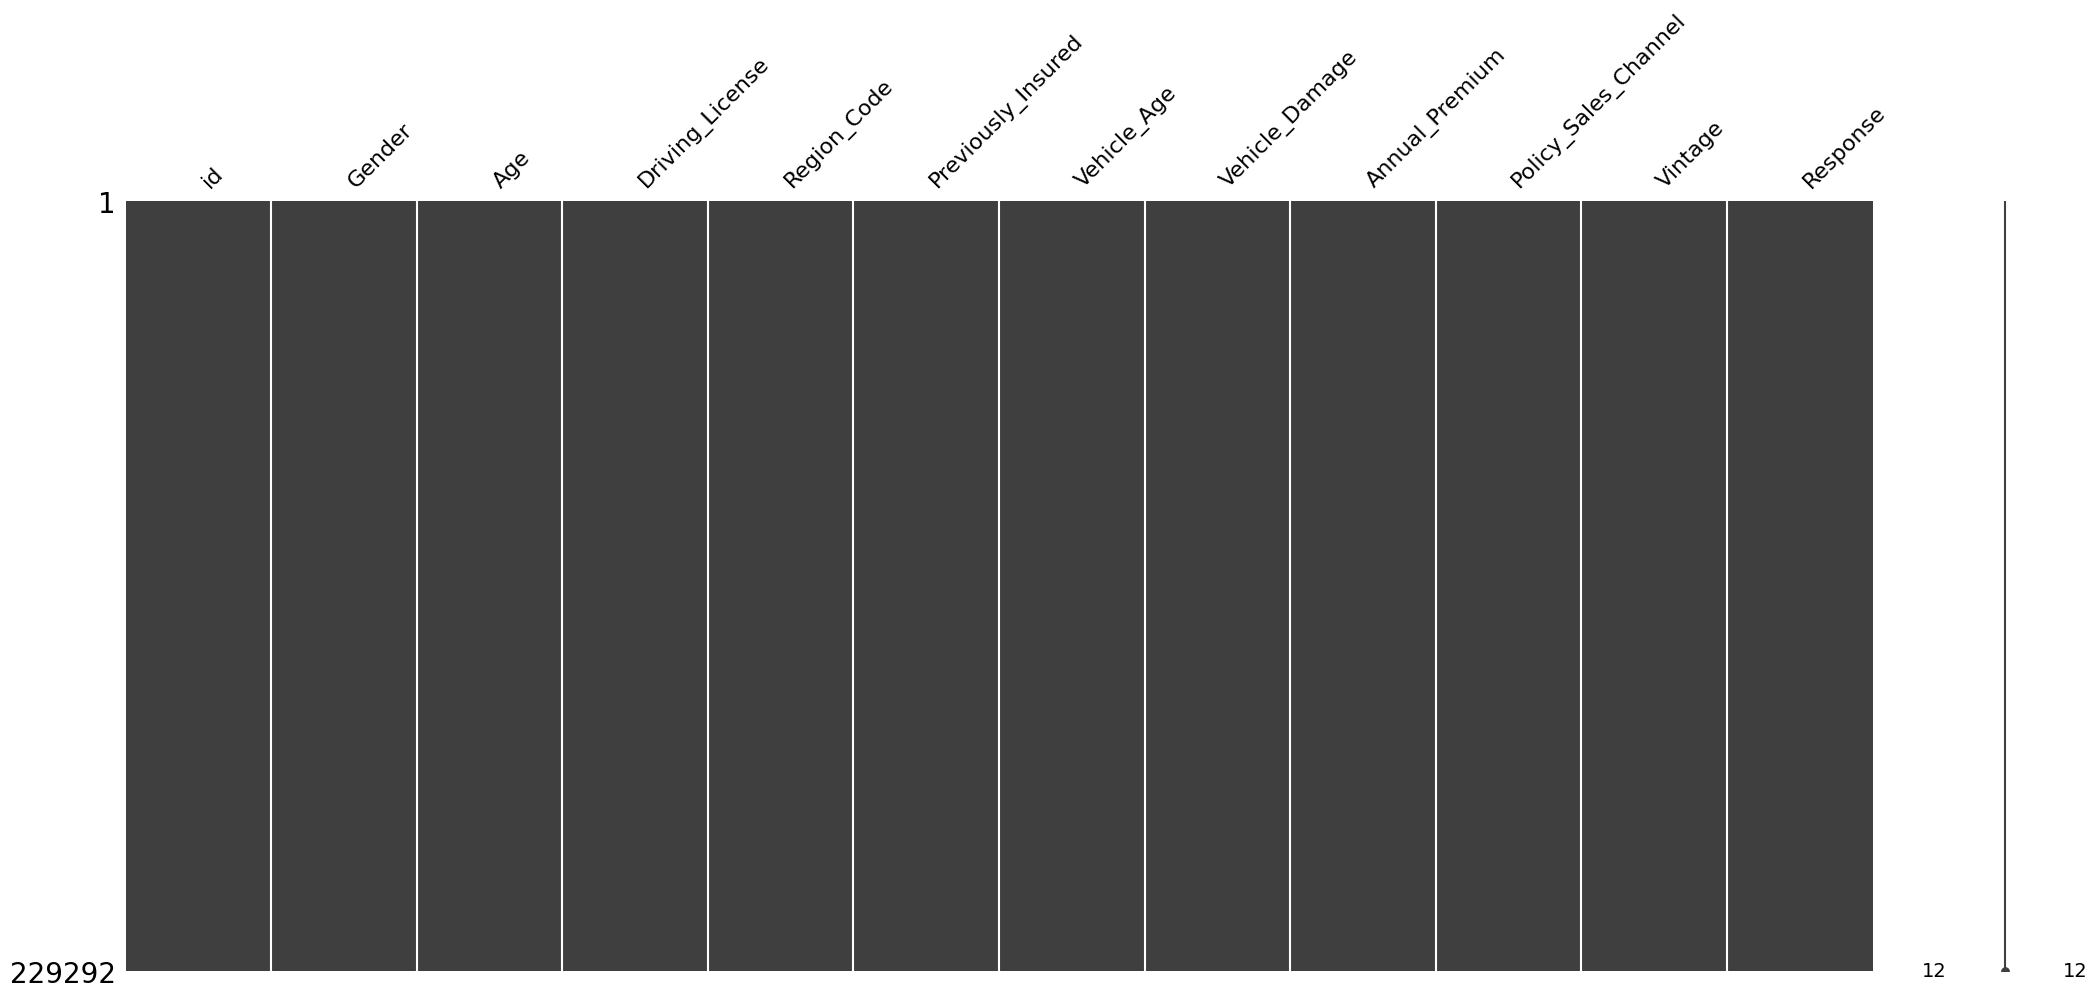

In [22]:
missingno.matrix(train_data)

In [23]:
ids = test_data["id"]
key = 'Response'
train_data

# Преобразование категориальных переменных в dummy/indicator переменные (one-hot encoding)
train_data = pd.get_dummies(train_data)
print(train_data)

# Разделение данных на признаки (x) и целевую переменную (y)
x = train_data.drop([key], axis=1) 
y = train_data[key]

# Разделение данных на тренировочную и тестовую выборки (70% - тренировочные, 30% - тестовые)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Инициализация и обучение стандартизатора (StandardScaler) на тренировочных данных
scaler_2 = StandardScaler()
scaler_2.fit(x_train)

# Применение стандартизации к тренировочным и тестовым данным
x_train_2 = scaler_2.transform(x_train)
x_test_2 = scaler_2.transform(x_test)

            id  Age  Driving_License  Region_Code  Previously_Insured  \
0       213892   48                1         35.0                   1   
1       269011   58                1         28.0                   0   
2        31464   44                1         28.0                   1   
3        86379   22                1          8.0                   0   
4       456843   24                1          6.0                   1   
...        ...  ...              ...          ...                 ...   
229287   50272   72                1         28.0                   1   
229288  254780   21                1         24.0                   1   
229289  380053   43                1         29.0                   0   
229290   69958   20                1         47.0                   1   
229291  303090   20                1         32.0                   0   

        Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0              24922.0                  26.0       86   

In [24]:
# Получение списка имен признаков (исключая последний столбец, который является целевой переменной)
feature_names = list(train_data.columns)[:-1]

# Выбор лучших признаков с использованием метода SelectKBest и mutual_info_classif (выбираем 8 лучших признаков)
sel_mi = SelectKBest(mutual_info_classif, k=8).fit(x, y)

# Создание списка кортежей, содержащих имена признаков и информацию о том, были ли они выбраны (True/False)
features = list(zip(feature_names, sel_mi.get_support()))
print(features)

# Формирование списка полезных признаков, начиная с 'id' и добавляя только те, которые были выбраны
useful_features = ['id'] + [i[0] for i in features if i[1]]
print(useful_features)

# Создание нового набора данных x_new, содержащего только полезные признаки
x_new = x[useful_features].copy(deep=True)

# Разделение нового набора данных на тренировочную и тестовую выборки (70% - тренировочные, 30% - тестовые)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.3)

# Применение стандартизации к новым тренировочным данным и трансформация тестовых данных на основе обученного scaler_2
x_train_new = scaler_2.fit_transform(x_train_new)
x_test_new = scaler_2.transform(x_test_new)

x_new.head()


[('id', np.False_), ('Age', np.True_), ('Driving_License', np.True_), ('Region_Code', np.False_), ('Previously_Insured', np.True_), ('Annual_Premium', np.False_), ('Policy_Sales_Channel', np.True_), ('Vintage', np.False_), ('Response', np.False_), ('Gender_Female', np.False_), ('Gender_Male', np.True_), ('Vehicle_Age_1-2 Year', np.True_), ('Vehicle_Age_< 1 Year', np.False_), ('Vehicle_Age_> 2 Years', np.True_), ('Vehicle_Damage_No', np.True_)]
['id', 'Age', 'Driving_License', 'Previously_Insured', 'Policy_Sales_Channel', 'Gender_Male', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No']


id  Age  Driving_License  Previously_Insured  Policy_Sales_Channel  \
0  213892   48                1                   1                  26.0   
1  269011   58                1                   0                  26.0   
2   31464   44                1                   1                  26.0   
3   86379   22                1                   0                 152.0   
4  456843   24                1                   1                 152.0   

   Gender_Male  Vehicle_Age_1-2 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_No  
0         True                  True                  False               True  
1         True                  True                  False              False  
2         True                  True                  False               True  
3        False                 False                  False              False  
4         True                 False                  False               True

# 4 Модели классификаторов с параметрами

In [25]:
models = {
    "Логистическая Регрессия": LogisticRegression(solver="liblinear"),
    "Метод Ближайших Соседей": KNeighborsClassifier(),
    "Наивный Байесовский Классификатор": GaussianNB(),
    "Линейный Дискриминантный Анализ": LinearDiscriminantAnalysis(),
    "Квадратичный Дискриминантный Анализ": QuadraticDiscriminantAnalysis(),
    "Машина Опорных Векторов": SVC()
}

# Словарь params содержит гиперпараметры для каждой модели, которые будут оптимизированы с помощью GridSearchCV.
params = {
    "Логистическая Регрессия": {"max_iter": [100],
                                 "solver": ['sag', 'saga', 'newton-cg'],
                                 "n_jobs": [-1]},
    "Метод Ближайших Соседей": {"n_neighbors": list(range(3, 7)),
                                 "weights": ["uniform", "distance"],
                                 "p": [1, 2, 3, 4]},  
    "Наивный Байесовский Классификатор": {},
    "Линейный Дискриминантный Анализ": {"solver":  ["svd", 'lsqr', "eigen"]},
    "Квадратичный Дискриминантный Анализ": {"reg_param": np.linspace(0, 1, num=101)},
    "Машина Опорных Векторов": {"kernel": ['poly'],
                                'probability': [True],
                                 "class_weight": ["balanced"],
                                 "max_iter": [-1]}
}
best_models = {}
for name, model in models.items():
    random_search = GridSearchCV(model, params[name], cv=5, scoring='roc_auc', n_jobs=-1)
    random_search.fit(x_train_new, y_train_new)  
    best_model = random_search.best_estimator_
    best_models[name] = best_model


   

KeyboardInterrupt: 

In [ ]:
print(best_models)

{'Логистическая Регрессия': LogisticRegression(n_jobs=-1, solver='newton-cg'), 'Метод Ближайших Соседей': KNeighborsClassifier(n_neighbors=6, p=4), 'Наивный Байесовский Классификатор': GaussianNB(), 'Линейный Дискриминантный Анализ': LinearDiscriminantAnalysis(), 'Квадратичный Дискриминантный Анализ': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.12)), 'Машина Опорных Векторов': SVC(class_weight='balanced', kernel='poly', probability=True)}


# 5 Применение техники сэмплирования к исходным несбалансированным данным

In [ ]:
results = {}

smote = SVMSMOTE(
    sampling_strategy='auto',  
    random_state=1, 
    k_neighbors=5,
    m_neighbors=10,
    svm_estimator = SVC()
)

smoted_x, smoted_y = smote.fit_resample(x_new, y)
for name, model in best_models.items():
    model.fit(smoted_x,  smoted_y)
    y_pred = model.predict_proba(smoted_x)[:,1]
    score = roc_auc_score(smoted_y, y_pred)
    results[name] = score  

print(results)

/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/sklearn/utils/optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.2830003357083874. Increase the number of iterations.
  warnings.warn(


{'Логистическая Регрессия': np.float64(0.9494177754829745), 'Метод Ближайших Соседей': np.float64(0.9260048158935481), 'Наивный Байесовский Классификатор': np.float64(0.8039002298938944), 'Линейный Дискриминантный Анализ': np.float64(0.9475031213106875), 'Квадратичный Дискриминантный Анализ': np.float64(0.9457395071099028), 'Машина Опорных Векторов': np.float64(0.7210102793825515)}


In [ ]:
best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]
print("Лучшая модель:", best_model_name)
# samsung innovation campus


Лучшая модель: Логистическая Регрессия


# 6 Предсказать целевую переменную для тестовой выборки

In [ ]:
test_data=pd.get_dummies(test_data)
y_pred = best_model.predict_proba(test_data[useful_features])[:, 1]
submission = pd.DataFrame({'id': ids, 'Response': y_pred})

submission.to_csv('submission.csv', index=False)
print("Файл submission.csv сохранен.")


Файл submission.csv сохранен.


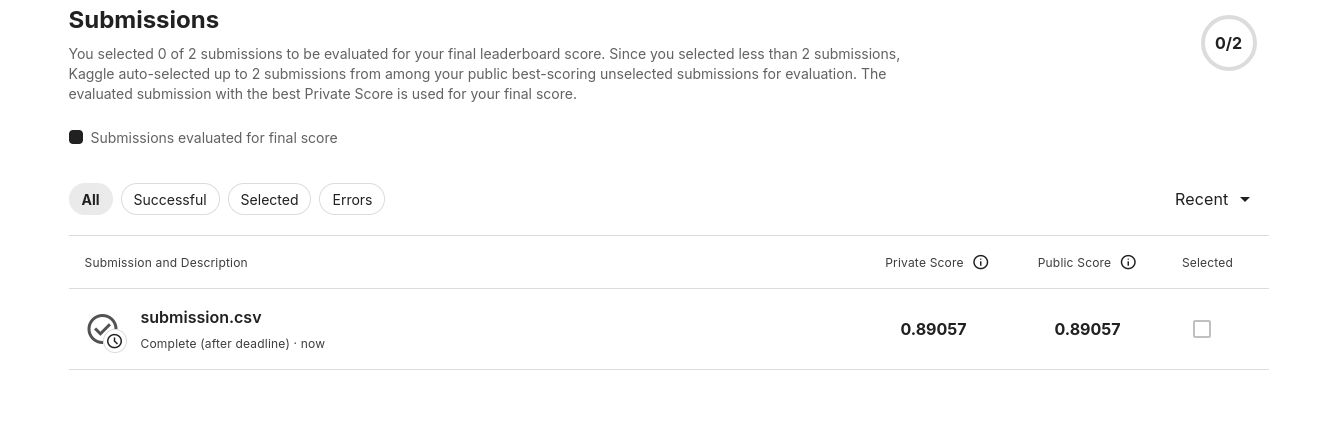